# MALIS Lab Session 1 - Fall 2020
## Due date: November 9 - 23:59

**Group :**

**FATEMEH CHANGIZIAN**

fatemeh.changizian@eurecom.fr

The aim of this lab is to practice with linear models for both regression and classification via simple experiments. 

#### Learning goals
After this lab, you should be able to:
1. Interpret the coefficent estimates produced by a linear model
2. Be familiar with the use of polynomial and categorical features
3. Be familiar with the building blocks of a pipeline to make building, fitting, and tracking models easier
3. Be able to make an informed choice of model based on the data at hand
4. Understand the key differences between nearest neighbor and linear models

#### Instructions:
Experiments should be made by groups of two students. Each group should produce a Jupyter Notebook with all their results and comments. 

Submit your complete notebook as an archive (tar -cf groupXnotebook.tar lab1/).

## Part 1: Linear Regression
In this part, we will be working with a dataset scraped by <a href="https://www.kaggle.com/mauryashubham/linear-regression-to-predict-market-value/data">Shubham Maurya</a>, which collects facts about players in the English Premier League as of 2017. His original goal was to establish if there was a relationship between a player's popularity and his market value, as estimated by transfermrkt.com.

**Your goal is to fit a model able to predict a player's market value.**

The dataset contains the following information:

| **Field**   |     **Description**      |  
|-------------|-------------|
| name   |  Name of the player | 
| club   |  Club of the player |
| age    | Age of the player |
|position| The usual position on the pitch|
|position_cat| 1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers|
|market_value| As on transfermrkt.com on July 20th, 2017|
|page_views| Average daily Wikipedia page views from September 1, 2016 to May 1, 2017|
|fpl_value| Value in Fantasy Premier League as on July 20th, 2017|
|fpl_sel| % of FPL players who have selected that player in their team|
|fpl_points| FPL points accumulated over the previous season|
|region| 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World|
|nationality| Player's nationality|
|new_foreign| Whether a new signing from a different league, for 2017/18 (till 20th July)|
|age_cat| a categorical version of the Age feature|
|club_id| a numerical version of the Club feature|
|big_club| Whether one of the Top 6 clubs|
|new_signing| Whether a new signing for 2017/18 (till 20th July)|

**Step 1:** The very first step is to have a deeper look into the data:
1. Using pandas extract a dataframe called *league_df* from the file *football_data.csv* which is inside the folder *data* (as done similarly in Lab_0)
2. Print the result of the method  ```name_dataframe.d_types```, in this way you print out the data types associated to each of the fields in the table
3. Run the method ```name_dataframe.head(N)``` to look at first N instances of the dataframe.
4. Use the method ```name_dataframe.describe( )``` to generate descriptive statistics that summarize each field of the dataframe

In [90]:
# Do NOT write in this cell, do NOT modify this cell
import numpy as np
np.random.seed(11)
print_solutions=False

In [135]:
import pandas as pd

league_df = pd.read_csv("data/football_data.csv")
print(league_df.dtypes)     # Print out the data types for each of the table fields 
league_df.head(10)          # name_dataframe.head(N) displays the first N entries of the dataframe.

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
5,Hector Bellerin,Arsenal,22,RB,3,30.0,1675,6.0,13.70%,119,2.0,Spain,0,2,1,1,0
6,Olivier Giroud,Arsenal,30,CF,1,22.0,2230,8.5,2.50%,116,2.0,France,0,4,1,1,0
7,Nacho Monreal,Arsenal,31,LB,3,13.0,555,5.5,4.70%,115,2.0,Spain,0,4,1,1,0
8,Shkodran Mustafi,Arsenal,25,CB,3,30.0,1877,5.5,4.00%,90,2.0,Germany,0,3,1,1,1
9,Alex Iwobi,Arsenal,21,LW,1,10.0,1812,5.5,1.00%,89,4.0,Nigeria,0,1,1,1,0


In [136]:
league_df.describe()        # Generate descriptive statistics that summarize each field of the dataframe

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [137]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/step1_0.py

In [138]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/step1_1.py

**Step 2 - Prepare the data:**
We split our data into two sets: one data set for training and another one that we will use at the end to test our model.

1. Import the function ```train_test_split``` from ```sklearn.model_selection```
2. Split your *league_df* in **input_df** made of all features except *market_value*, and **output_df** made of the feature *market_value* (*Hint :* to copy the values of a dataframe to another use the method ```name_dataframe['name_attribute'].copy()```, to drop an attribute use ```name_dataframe.drop('name_attribute',axis=1)```)
3. Use ```train_test_split``` with a *test_size*=0.25 (25 % of inputs became the test set) in following way to obtain a train set and a test set.

    ```X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2)```

In [139]:
from sklearn.model_selection import train_test_split #Step 1
output_df=league_df['market_value'].copy()  #Step 2
input_df=league_df.drop(['market_value'],axis=1)

In [140]:
if print_solutions==True :
    %load ./solutions/step2.py
    
#Split train test which 25 % of inputs became the test set.    
X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.25)

The dataset contains a lot of features that can be used to build the model. We will start by using <code>age, fpl_value, big_club</code> and <code>page_views</code>. 

\begin{equation}
 \hat{y} = W_0 + W_1\ x_{age} + W_2\ x_{fplavalue} + W_3\ x_{bigclub} + W_4\ \sqrt{x_{pageviews}}
\end{equation}

We need to use *numpy* library and

<code>from sklearn.preprocessing import PolynomialFeatures<\code>

we define a function called *prepare_data(name_dataframe)* which does the following:
1. extract the above features from the dataframe and assign to a variable
2. apply the *np.sqrt( )* on the values of <code>page_views</code>
3. transform our variable in numpy array <code>np.array(variable)</code>
4. and then add a columns of ones (for the variable of $W_0$) to the dummy variable
5. return our variable
    
We then apply our function to *X_train* and *X_test* to obtain *input_train1* and *input_test1* respectively
Then we create also *output_train* and *output_test* moving to numpy array *y_train1* and *y_test1* respectively. Test data will be used later in the code


In [141]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)

    return variable_array

input_train1 = prepare_data(X_train)
input_test1 = prepare_data(X_test)
output_train1 = np.array(y_train)
output_test1 = np.array(y_test)

**Step 3 - Training**

Here we define a class called *my_linear_regression* which initializes with *__init__(self)* as empty the properties self.X_train, self.y_train and self.weights. Then we define the method *fit()* of the class which needs as parameters a matrix (X) and an array (y) with the outputs. With those parameters the class initializes self.x_train, self.y_train using the matrix and the array respectively and self.weigths using the formula of the linear regression: $$\hat{W}=(𝑿^𝑇\ 𝑿)^{−1}𝑿^𝑇\ 𝒚$$

We are using the function *np.linalg.solve*($𝑿^𝑇\ 𝑿,𝑿^𝑇\ 𝒚$) to obtain $\hat{W}$ because it is more efficient than matrix inversion and it avoids numerical inestabilities.

The last function in the object *my_linear_regression* is the function *predict()*. Given the weights obtained through fit, this method estimates new y values using the input matrix X_test: 

<code>self.y_hat=np.sum(X*self.weights,axis=1)<\code>

The function also receives an array y with the true y values to compute the mean square error (MSE) using the formula : $$MSE = \dfrac{1}{N}\sum_{i=1}^{N}(y_i -\hat{y}_i)^2$$, where $y_i$ is y_test[i]. 
    
**Implement the MSE.**

In [142]:
class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        self.weights = np.linalg.solve(X.T@X,X.T@y)
    
    def predict(self,x_test,y_test) : # method of the object that can be used
        self.y_hat = np.sum(x_test*self.weights,axis=1)
    
        N = len(y_test)
        #Compute the mean square error (MSE):
        self.MSE = (np.sum((y_test - self.y_hat)**2))/ N
        
        return self.y_hat, self.MSE

Run your class by creating an object called *model_1* and fit it using the training data *(input_train1, output_train1)*, then predict the *y_hat* using the the **training** (NOT test) inputs and the training targets. Finally print the output of your weights weight[0], weight[1:] and your MSE obtained to see the parameters of your model and its performance with training data. (*Hint :* *model_1.property_name*)

In [143]:
if print_solutions==True :
    %load ./solutions/step3.py

In [144]:
model_1 = my_linear_regression() # Call model_1
model_1.fit(input_train1, output_train1) # Fit the model using the training data
output_train_hat, mse = model_1.predict(input_train1, output_train1) # Predict the y_hat using the the training 

print('The output of weights [weight[0], weight[1:]] and obtained MSE_1: >>>')
print('*******************************************************************************************')    
print('[W_0,W] : [', model_1.weights[0],',', model_1.weights[1:], ']' )
print('MSE training: ', model_1.MSE)
mse1 = model_1.MSE
print('*******************************************************************************************')    
#return mse

# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see an error smaller than 10^(-8)
import check 

print("############# absolute error in training MSE computation #############\n")
print('absolute error case 1 = %e \n' %abs(model_1.MSE-check.MSE_train_correct_1))
print("######################################################################\n")

The output of weights [weight[0], weight[1:]] and obtained MSE_1: >>>
*******************************************************************************************
[W_0,W] : [ -19.11162814882506 , [-0.11391484  4.51149558  5.17434206  0.29202352] ]
MSE training:  43.033709019828834
*******************************************************************************************
############# absolute error in training MSE computation #############

absolute error case 1 = 7.105427e-15 

######################################################################



<div class="alert alert-info">
**Question 1:** 
    How do you interpret the values of each of these parameters? Based on this information, what can you say about the effect in a player's market value of his:
    1. age?
    2. number of page views?
    3. fpl value?
</div>    

<div class="alert alert-info">
    
**Answer 1:** 
According to the Weights, the most weighted parameter belongs to W3 big_club feature, this means that it is the most effective parameter in the model and the market value of a player depends the most on whether his team is on top 6 or not, even slight changes in big_club feature can change the player's market value a lot. About other features, fpl_value seems to also have high weight so, it has effect on a player value as well.
    On the other hand, the coefficients for age and page_views is really low therefore, they won't affect much the player's value.
</div>

In [145]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/question1.py
    

In [146]:
# do NOT modify this cell, convert it into Markdown cell after load
if print_solutions==True :
    %load ./solutions/question1.md

#### Including polynomial features
A *scatter matrix* is a pair-wise scatter plot of several variables presented in a matrix format. It can be used to determine whether the variables are correlated and whether the correlation is positive or negative.

From the scatter matrix below we can explore the relationship that each "potential" input variable has with the target variable: the market value. 

When looking at the correlation between age and market value (first column, last row), it does not seem to be linear. 

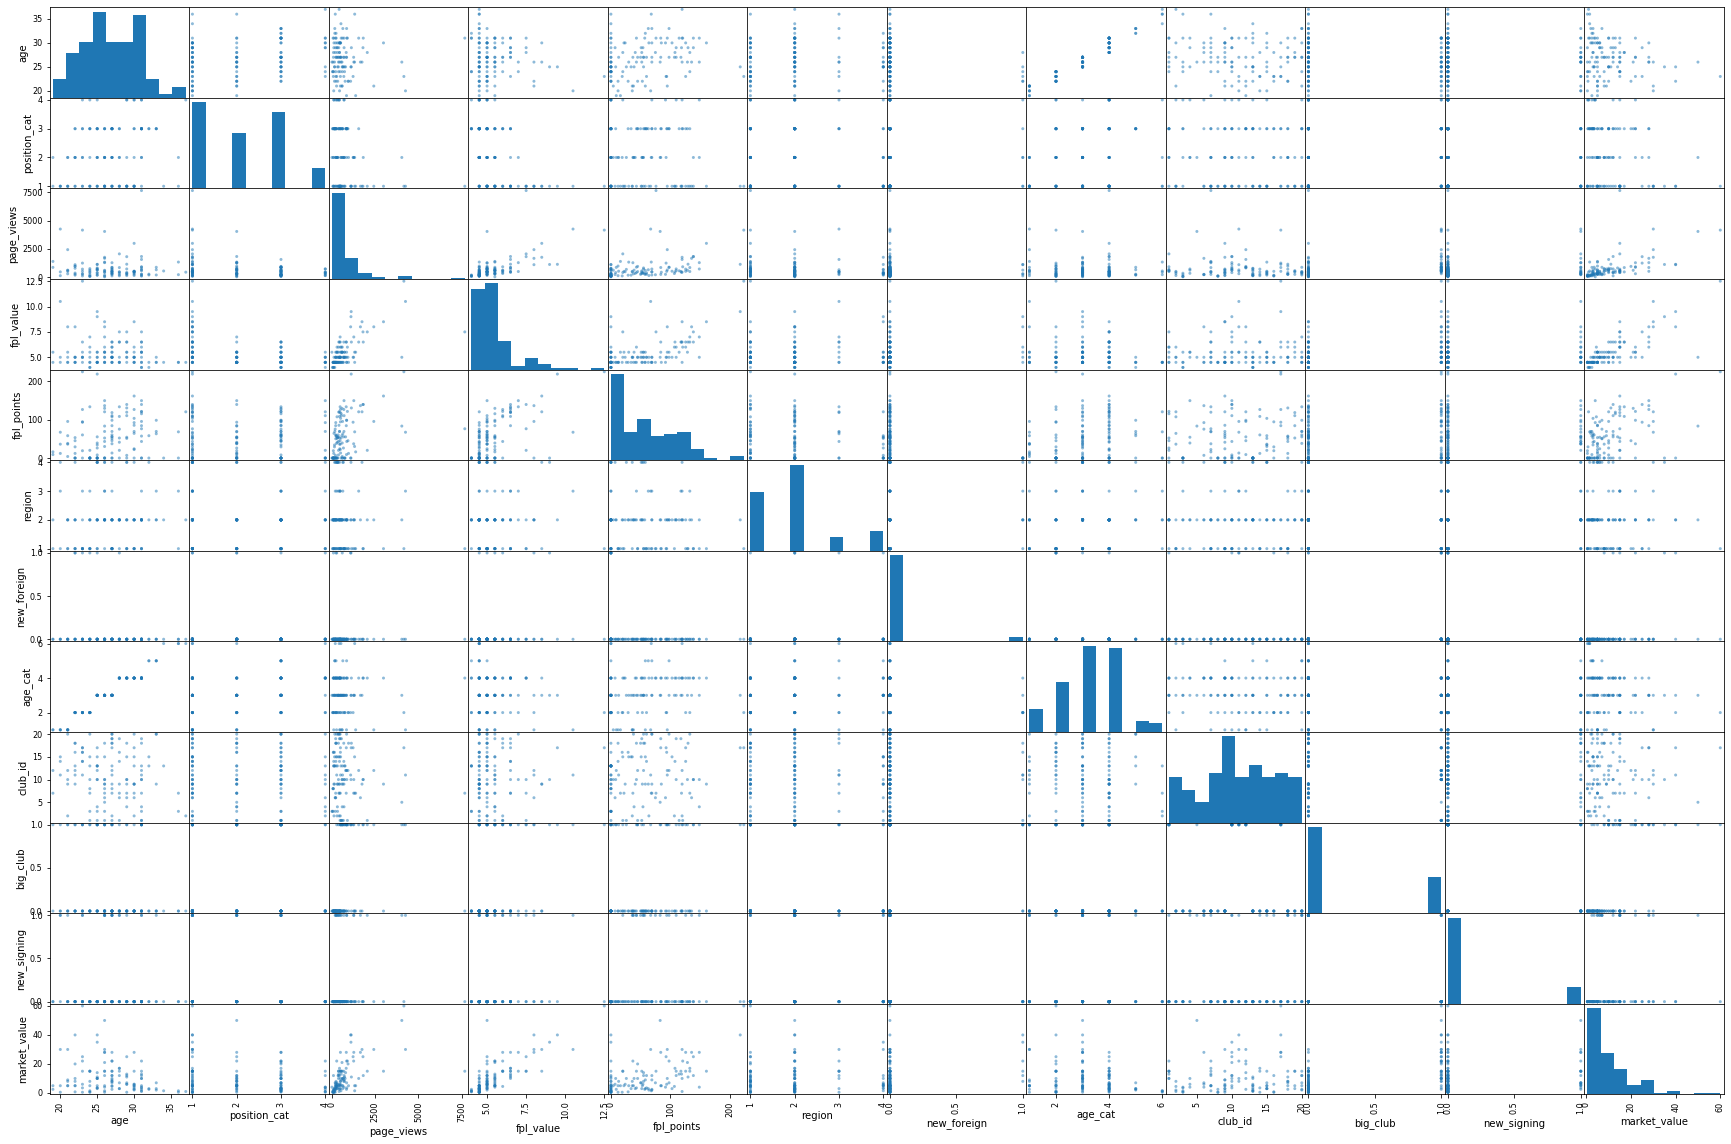

In [147]:
from pandas.plotting import scatter_matrix
to_plot=pd.concat([X_test,y_test],axis=1)
scatter_matrix(to_plot, figsize=(30,20));

In more detail:

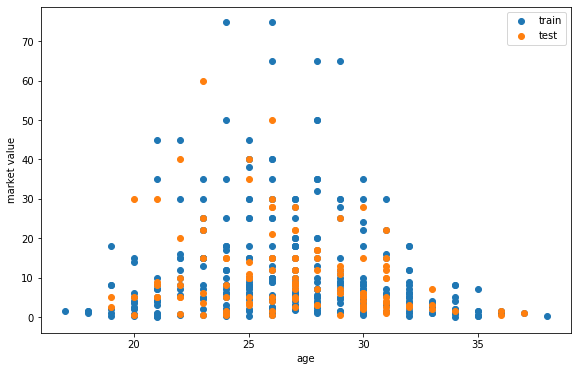

In [148]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [9.5, 6]
plt.scatter(input_train1[:,1], output_train1)
plt.scatter(input_test1[:,1], output_test1)
plt.legend(['train', 'test'])
plt.xlabel('age')
plt.ylabel('market value')
plt.show()

Let us explore considering a more complex effect of the age by including a quadratic term: 

\begin{equation}
 \hat{y} = w_0 + w_1* x_{age} + w_2* x_{fplvalue} + w_3*x_{bigclub} + w_4*\sqrt{x_{pageviews}} + w_5*x_{age}^2
\end{equation}

The function below prepares the data to fit to this new model.

<div class="alert alert-info">

**Exercise 2:** Create a new function *prepare_new_data(name_dataframe)* as done before, but which includes also the quadratic term regarding the age this time. Then as done before create input_train_2, input_test_2, output_train_2 and output_test_2 and run your linear regression (you need only to run your class, not to define again the class) but initialize a new object. (E.g. *model_2=my_linear_regression(...)*). Again show the weights and the resulting MSE for the training data.

</div>

In [149]:
def prepare_data_with_age(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable['squared_age'] = np.square(df[['age']]) # consider the age by a quadratic term
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)

    return variable_array

#Prepare the data to fit to this new model (model_2):
input_train2 = prepare_data_with_age(X_train)
input_test2 = prepare_data_with_age(X_test)
output_train2 = np.array(y_train)
output_test2 = np.array(y_test)

model_2 = my_linear_regression()
model_2.fit(input_train2, output_train2)
output_train_hat, mse = model_2.predict(input_train2, output_train2)

print('The output of weights [weight[0], weight[1:]] and obtained MSE_2: >>>')
print('*******************************************************************************************')
print('[W_0,W] : [', model_2.weights[0],',', model_2.weights[1:], ']' )
print('MSE training: ', model_2.MSE)
mse2 = model_2.MSE
print('*******************************************************************************************')    

The output of weights [weight[0], weight[1:]] and obtained MSE_2: >>>
*******************************************************************************************
[W_0,W] : [ -96.59926790780781 , [ 5.95534714  3.83273605  5.52299435  0.32873672 -0.11229756] ]
MSE training:  37.85294206603823
*******************************************************************************************


In [150]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/exercise2.py
    

In [151]:
# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see an error smaller than 10^(-8)

print("############# absolute error in training MSE computation #############\n")
print('absolute error case 2 = %e \n' %abs(model_2.MSE-check.MSE_train_correct_2))
print("######################################################################\n")

############# absolute error in training MSE computation #############

absolute error case 2 = 1.421085e-14 

######################################################################



<div class="alert alert-info">

**Question 2:** Based on your MSE and weights results, what can you say about adding this term $age^2$ to your model?

</div>

<div class="alert alert-info">
    
**Answer 2:** 
    The mean squared error value of model 2 has reduced from 43 to 37.85 on training set by adding the feature term age^2, which means that the new model can give a better estimation of the player market value. So, adding a polynomial feature (age^2) makes the MSE better but more complicated. 
</div>

#### Including categorical features
It is well known that the position where a football player plays has an impact in his market value. Midfielders and stikers tend to be more expensive. *Your goal now is to include this information in the model.*  

As seen from the description, the player position is encoded as a numeric variable (1, 2, 3, 4). However, they represent categories and not values on their own. Categorical variables are commonly encoded under a scheme denoted 1-of-K encoding. This allows to convert a variable representing K different categories into K different binary values. Example: 

| **attacker**   |     **midfielder** | **defender** | **goalkeeper**      |  
|-------------|-------------|-------------|-------------|
| 1   |  0 | 0 | 0 |
| 0   |  1 | 0 | 0 |
| 0   |  0 | 1 | 0 |
| 0   |  0 | 0 | 1 |


**Look carefully below** how to implement 1-of-K encoding so that your model includes information about a player's position
\begin{equation}
 \hat{y} = w_0 + w_1*x_{age} + w_2*x_{fplvalue} + w_3*x_{bigclub} + w_4*x_{pageviews} + w_5*x_{age}^2 + w_6*x_{attaker} + w_7*x_{midfielder} + w_8*x_{defender} +w_9*x_{goalkeeper}
\end{equation}    



In [84]:
def prepare_data_with_position(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable['square_age'] = np.power( df[['age']],2)
    
    #create 1-of-K encoding position:
    variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos')) # get_dummies to create 1-of-K encoding, join to add the new columns
    
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)
    
    return variable_array

<div class="alert alert-info">

**Exercise 3:** As done before create input_train3, input_test3, output_train3 and output_test3 but using this time the function *prepare_data_with_position(df)*  and run you linear regression (you need only to run it, not to define it) creating a new object (E.g. *model_3=my_linear_regression(...)*). Again show the weights and the resulting MSE for this new model with training data.

</div>

In [85]:
#Prepare the data to fit to this new model (model_3):

input_train3 = prepare_data_with_position(X_train)
input_test3 = prepare_data_with_position(X_test)
output_train3 = np.array(y_train)
output_test3 = np.array(y_test)

model_3 = my_linear_regression()
model_3.fit(input_train3, output_train3)
output_train_hat, mse = model_3.predict(input_train3, output_train3)

print('The output of weights [weight[0], weight[1:]] and obtained MSE_3: >>>')
print('*******************************************************************************************')
print('[W_0,W] : [', model_3.weights[0],',', model_3.weights[1:], ']' )
print('MSE training: ', model_3.MSE)
mse3 = model_3.MSE
print('*******************************************************************************************')  

The output of weights [weight[0], weight[1:]] and obtained MSE_3: >>>
*******************************************************************************************
[W_0,W] : [ -55.240984751929325 , [  5.22348717   5.51839623   3.73696787   0.30460067  -0.10124154
 -42.17661977 -36.10406701 -35.97412564 -34.75413799] ]
MSE training:  32.569639592369484
*******************************************************************************************


In [86]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/exercise3_0.py

In [87]:
# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see an error smaller than 10^(-8)

print("############# absolute error in training MSE computation #############\n")
print('absolute error case 3 = %e \n' %abs(model_3.MSE-check.MSE_train_correct_3))
print("######################################################################\n")

############# absolute error in training MSE computation #############

absolute error case 3 = 2.131628e-14 

######################################################################



Now **print** the MSE for training in the 3 cases and then **test** your 3 models (use the predict function they have) with their respective test data and print the MSE for testing in the 3 cases.
E.g. model_1.predict(input_test1,output_test1)

In [88]:
print("Compute MSE for training data in 3 model cases >>>>>>>>>")
print('MSE model_1: ', mse1)
print('MSE model_2: ', mse2)
print('MSE model_3: ', mse3)
print("#####################################################\n")

print("Compute MSE for test data >>>>>>>>>")

#case1:
#model_1 = my_linear_regression()
#model_1.fit(input_test1, output_test1)
model_1.predict(input_test1, output_test1)
print('MSE test model_1: ', model_1.MSE) 

#case2:
#model_2 = my_linear_regression()
#model_2.fit(input_test2, output_test2)
model_2.predict(input_test2, output_test2)
print('MSE test model_2: ', model_2.MSE)

#case3:
#model_3 = my_linear_regression()
#model_3.fit(input_test3, output_test3)
model_3.predict(input_test3, output_test3)
print('MSE test model_3: ', model_3.MSE)
print("#####################################################\n")


Compute MSE for training data in 3 model cases >>>>>>>>>
MSE model_1:  43.033709019828834
MSE model_2:  37.85294206603823
MSE model_3:  32.569639592369484
#####################################################

Compute MSE for test data >>>>>>>>>
MSE test model_1:  36.74870366001146
MSE test model_2:  33.5048434023512
MSE test model_3:  34.42512492881001
#####################################################



In [89]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/exercise3_1.py

In [90]:
# COMPARISON OF YOUR MSE RESULTS WITH CORRECT ONES
# You should see errorS smaller than 10^(-8)

print("############# absolute error in test MSE computation #################\n")
print('absolute error case 1 = %e \n' %abs(model_1.MSE-check.MSE_test_correct_1))
print('absolute error case 2 = %e \n' %abs(model_2.MSE-check.MSE_test_correct_2))
print('absolute error case 3 = %e \n' %abs(model_3.MSE-check.MSE_test_correct_3))
print("######################################################################\n")

############# absolute error in test MSE computation #################

absolute error case 1 = 2.842171e-14 

absolute error case 2 = 4.263256e-14 

absolute error case 3 = 8.526513e-14 

######################################################################




<div class="alert alert-info">

**Question 3:** Based on your results, what can you say about adding the player's position to your model?

</div>

<div class="alert alert-info">
    
**Answer 3:** 
    Adding the player's position to our model reduced MSE on training set (from 37 to 32) but increased the MSE on test set (from 33 to 34). So, Including players positions has slightly improved the model on the training data by reducing the mean squared error value.
</div>

<div class="alert alert-info">

**Exercise 4:** To deal with the apparent non-linear relationship between age and market value, 
<a href="https://www.kaggle.com/mauryashubham/linear-regression-to-predict-market-value/data">Shubham Maurya</a> suggests to use categorical features for the age. Using your implementation of the 1-of-K encoding, include the age categorical features into the model (create a new *prepare_data_with_position_and_age()* function with also the categorical age).

It is up to you to decide if you will keep or not as before also $x_{age}$ and $x_{age}^2$ as non categorical features. Whichever your choice is, <u>justify clearly your answer</u>. 
    
Run the model and print and compare now the training error (MSE) for the four models.

</div>

In [152]:
def prepare_data_with_position_and_age(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable['square_age'] = np.power( df[['age']],2)
    
    #create 1-of-K encoding position:
    variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos')) # get_dummies to create 1-of-K encoding, join to add the new columns
    
    #create 1-of-K encoding age:
    #variable['17-21'] = (variable[['age_cat']] == 1).astype('int')
    #variable['22-25'] = (variable[['age_cat']] == 2).astype('int')
    #variable['26-28'] = (variable[['age_cat']] == 3).astype('int')
    #variable['29-31'] = (variable[['age_cat']] == 4).astype('int')
    #variable['32-38'] = (variable[['age_cat']] == 5).astype('int')
    #variable = variable.drop(['age_cat'],axis=1)

    variable=variable.join(pd.get_dummies(df.age_cat, prefix='age_cat')) # get_dummies to create 1-of-K encoding, join to add the new columns
    
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)
    
    return variable_array

input_train4 = prepare_data_with_position_and_age(X_train)
input_test4 = prepare_data_with_position_and_age(X_test)
output_train4 = np.array(y_train)
output_test4 = np.array(y_test)

model_4 = my_linear_regression()
model_4.fit(input_train4, output_train4)
output_train_hat, mse = model_4.predict(input_train4, output_train4)

print('The output of weights [weight[0], weight[1:]] and obtained MSE_4: >>>')
print('*******************************************************************************************')
print('[W_0,W] : [', model_4.weights[0],',', model_4.weights[1:], ']' )
print('MSE training: ', model_4.MSE)
mse4 = model_4.MSE
print('*******************************************************************************************')   

The output of weights [weight[0], weight[1:]] and obtained MSE_4: >>>
*******************************************************************************************
[W_0,W] : [ 63.76663592492294 , [ 2.03814658e+00  5.53375603e+00  3.71588454e+00  3.01876809e-01
 -4.40087817e-02 -2.89681892e+01 -2.27592220e+01 -2.27150076e+01
 -2.13624395e+01 -9.19200566e+01 -8.89603677e+01 -8.81767246e+01
 -8.78533520e+01 -8.95583951e+01 -9.11602627e+01] ]
MSE training:  32.257587947902685
*******************************************************************************************


In [153]:
print("############# training MSE computation #############\n")
print('MSE model_1: ', mse1)
print('MSE model_2: ', mse2)
print('MSE model_3: ', mse3)
print('MSE model_4: ', mse4)
print("#####################################################\n")

############# training MSE computation #############

MSE model_1:  43.033709019828834
MSE model_2:  37.85294206603823
MSE model_3:  32.569639592369484
MSE model_4:  32.257587947902685
#####################################################



In [154]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/exercise4.py

In [155]:
# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see error smaller than 10^(-8)

print("############# absolute error in training MSE computation #############\n")
print('absolute error case 4 = %e \n' %abs(model_4.MSE-check.MSE_train_correct_4))
print("######################################################################\n")

############# absolute error in training MSE computation #############

absolute error case 4 = 0.000000e+00 

######################################################################



<div class="alert alert-info">

**Question 4:** Based on your MSE results, which model would you choose to predict a player's market value? Justify your answer.

</div>

<div class="alert alert-info">
    
**Answer 4:** 
    Based on the results, I would choose the model with the smallest mean squared error value (e.g. the third model) since the MSE in model_3 is apporoximaly the same as the MSE for model_4 and also with considering the fact that model_3 is alot simpler than model_4, so the third one would be the best and reasonable choice. 
    
    *** When I run the code again, the smallest mean squared error value is belong to the 4th model, so, I can also choose model_4 but considering the slight difference in MSE with model_3 and its complexity, it might be again reasonable to use model_3.
</div>

**Step 4 - Prediction:** Now, use the models to predict the market value of the players in the respective test data and print the test error.

In [156]:
print("MSE computation for test data >>>>>>>>>>>>>>>")

#case1:
model_1.predict(input_test1, output_test1)
print('MSE test1: ', model_1.MSE) 

#case2:
model_2.predict(input_test2, output_test2)
print('MSE test2: ', model_2.MSE)

#case3:
model_3.predict(input_test3, output_test3)
print('MSE test3: ', model_3.MSE)

#case4:
model_4.predict(input_test4, output_test4)
print('MSE test4: ', model_4.MSE)

print("#####################################################\n")

MSE computation for test data >>>>>>>>>>>>>>>
MSE test1:  36.74870366001146
MSE test2:  33.5048434023512
MSE test3:  34.42512492881001
MSE test4:  35.3870725025981
#####################################################



In [157]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/step4.py

In [158]:
# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see error smaller than 10^(-8)

print("############# absolute error in test MSE computation #############\n")
print('absolute error case 4 = %e \n' %abs(model_4.MSE-check.MSE_test_correct_4))
print("######################################################################\n")

############# absolute error in test MSE computation #############

absolute error case 4 = 6.892265e-13 

######################################################################



<div class="alert alert-info">

**Question 5:** How did your model do? Was it the best performing? Based on your intuition (as this topic has not been yet covered), try to explain the obtained performance (i.e. why some models do better than others)? 

</div>

<div class="alert alert-info">
    
**Answer 5:**
    The result on unseen test data shows that the best MSE is achieved by model 2, although on training data the best one is model 3 (~ model 4). So, based on out knowledge, an overfitting issue might be the reason to behave like that. By that I mean Model 4 on test data is too complicated which can cause best MSE score on training data but poorer MSE score on test data in comparison to the other models.

In this situation we would rather choose model 2 which has the lowest MSE.
</div>

# Part 2: Linear Models for Classification


In this part, we will be working with the <a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease">Heart Disease dataset</a>, from the <a href="https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning Repository</a>. 

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database that we will use is the only one that has been used by ML researchers to this date. The "diagnosis" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Additionally, there is a condition field that labels subjects as healthy (H, which is equivalent to condition 0) or with a diagnosed disease (D, which gathers any subject with condition 1-4). 

Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

**The goal of this section is to build two classifiers: ona that can discriminate healthy from diseased subjects and a second one that can precisely identify the diagnosis of a subject.**

The dataset contains the following information:

| **Field**   |     **Description**      |  
|-------------|-------------|
| age         |  age in years |
| sex         |  (1 = male; 0 = female) |
|cp           |chest pain type |
|trestbps     |resting blood pressure (in mm Hg on admission to the hospital)|
|cholserum  |  cholestoral in mg/dl|
|fbs        |(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|restecg | resting electrocardiographic results|
|thalach |maximum heart rate achieved|
|exang | exercise induced angina (1 = yes; 0 = no)|
|oldpeak | ST depression induced by exercise relative to rest |
|slope |the slope of the peak exercise ST segment |
|ca | number of major vessels (0-3) colored by flourosopy |
|thal | 3 = normal; 6 = fixed defect; 7 = reversable defect|
| diagnosis | 0= normal, 1,2,3,4 disease conditions|
| condition | H=Healthy D=Diseased |

**Step 1:** As usual, we start by inspecting the dataset, split in training and test and prepare the data

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

np.random.seed(2)

heart_df_full=pd.read_csv('./data/processed.cleveland.data') # read_csv since the file contains commas to separate fields
heart_df=heart_df_full[~(heart_df_full == '?').any(1)]

print('FIELDS:\n\n',heart_df.dtypes)
print('\nValues in the dataframe\n')
heart_df.head()

FIELDS:

 age          float64
sex          float64
cp           float64
trestbps     float64
chol         float64
fbs          float64
restecg      float64
thalach      float64
exang        float64
oldpeak      float64
slope        float64
ca            object
thal          object
diagnosis      int64
condition     object
dtype: object

Values in the dataframe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,condition
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,H
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,D
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,D
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,H
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,H


In [99]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [100]:
# We split the data into training and testing

X_train, X_test, y_train_all, y_test_all=train_test_split(heart_df.drop(['condition','diagnosis'], axis=1), heart_df[['condition','diagnosis']], test_size=60)
y_train=y_train_all['condition']
y_test=y_test_all['condition']

# We define the function to prepare the data (1-of-K encoding for some variables)

def prepare_data(df):
    X_cols = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()
    X_cols=X_cols.join(pd.get_dummies(df.sex, prefix='sex'))
    X_cols=X_cols.join(pd.get_dummies(df.cp, prefix='cp'))
    X_cols=X_cols.join(pd.get_dummies(df.fbs, prefix='fbs'))
    X_cols=X_cols.join(pd.get_dummies(df.restecg, prefix='restecg'))
    X_cols=X_cols.join(pd.get_dummies(df.exang, prefix='exang'))
    X_cols=X_cols.join(pd.get_dummies(df.slope, prefix='slope'))
    X_cols=X_cols.join(pd.get_dummies(df.ca, prefix='ca'))
    X_cols=X_cols.join(pd.get_dummies(df.thal, prefix='thal'))
    
    X = X_cols.values # from dataframe to numpy
    
    return X

# We prepare the data

input_train = prepare_data(X_train)
input_test = prepare_data(X_test)

<div class="alert alert-info"> 

**Question 6:** Which features have been encoded using 1-of-K encoding? Why? <u>justify your answer</u>. 

</div>

<div class="alert alert-info">
    
**Answer 6:** 
    
    We 1-of-K encoded the following features: sex, cp, fbs, restecg, exang, slope, ca and thal. That's because as we know from previous part description, all of these features represent categories and not values on their own:
    
    [sex:(1 = male; 0 = female), cp:chest pain type, fbs(fasting blood sugar > 120 mg/dl): (1 = true; 0 = false), restecg: resting electrocardiographic results, exang: exercise induced angina (1 = yes; 0 = no), slope: the slope of the peak exercise ST segment, ca:number of major vessels (0-3) colored by flourosopy, thal: 3 = normal; 6 = fixed defect; 7 = reversable defect]
    
    
    So, they are encoded as a numeric variable. (Categorical variables are commonly encoded under a scheme denoted 1-of-K encoding. This allows to convert a variable representing K different categories into K different binary values). 
</div>

#### Binary classification
We will first use the input data to train a binary classifier using Logistic Regression. 
This time, we will use the algorithm as implemented by the library <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn.</a>

**Step 2 - Training** is just about using the function logistic regression with input_train and y_train. We will call the LogisticRegression object *LR_model_1*. we will use <code>max_iter=200</code> and <code>solver='liblinear'</code> as parameters when you use LogisticRegression

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
LR_model_1 = LogisticRegression(solver='liblinear', max_iter=200)
LR_model_1.fit(input_train, y_train);

In [103]:
print('*************** Estimated parameters: ***********************')
print('[W_0] : ',LR_model_1.intercept_,'\n[W] :', LR_model_1.coef_ )

*************** Estimated parameters: ***********************
[W_0] :  [0.01898064] 
[W] : [[ 0.01877868 -0.02286571 -0.00554372  0.02394627 -0.38879838  0.64376601
  -0.62478537  0.49739149 -0.33870321  0.77750004 -0.91720769 -0.15212713
   0.17110777  0.2316368   0.00201525 -0.21467142  0.06334081 -0.04436018
   0.40614068 -0.33136609 -0.05579395  1.55453591 -0.24998756 -0.54042946
  -0.74513826  0.72431639  0.35061462 -1.05595037]]


<div class="alert alert-info">

**Question 7:** Based on these results, what can you say about the incidence of age in having a heart disease? Of Cholesterol? <u>justify your answer</u>. 

</div>

<div class="alert alert-info">
    
**Answer 7:** 
    Acoording to the W coefficient, we can see that the presence of the heart disease is dependent on age since 𝑤1=0.02097081, that means older people are more likely to have the heart disease and also 𝑤3=-0.00599095 for Cholesterol,so, Cholesterol presence has very low negative impact on the presence of the heart disease.
</div>

**Step 3 - Predict:** Similarly as we did with the linear regression part, the function below collects the steps needed to predict the output of new data and to then assess the performance. To measure the performance of a classifier we will use accuracy. We define accuracy as:

\begin{equation}
accuracy = \dfrac{\#correct}{\#samples}
\end{equation}

where $\#correct$ denotes the number of correctly classified samples and $\#samples$ the total number of samples under consideration.

<div class="alert alert-info">

**Exercise 6:** Create the function *predict_and_test(LR_model, X, y)* to predict results given *input_test* and then compute accuracy counting the number of correct predictions knowing that *output_test* is the correct prediction. (*Hint :* LogisticRegression objects have their predict function, just call it.). Then use your function to compute the **training** accuracy of your model. Call the accuracy *accuracy_training*

</div>

In [104]:
from sklearn.metrics import accuracy_score
def predict_and_test(LR_model, X, y):
    y_hat = LR_model.predict(X)
    acc= accuracy_score(y, y_hat)
    return acc

# **Second method**
#def predict_and_test(LR_model, X, y):
#    y_hat = LR_model.predict(X)
#    count = 0
#    for in in range(len(y_hat)):
#        if y_hat[i] == y[i]:
#              count += 1;
#    acc= count/len(y_hat)
#    return acc

accuracy_training = predict_and_test(LR_model_1,input_train, y_train)

print('Training accuracy: ', accuracy_training)

Training accuracy:  0.890295358649789


In [105]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/part2_step3.py

In [106]:
# COMPARISON OF YOUR ACCURACY RESULT WITH CORRECT ONE
# You should see error smaller than 10^(-8)
import check

print("############# absolute error in training accuracy computation#########\n")
print('absolute error case 1 = %e \n' %abs(accuracy_training - check.accuracy_training_correct_1))
print("######################################################################\n")

############# absolute error in training accuracy computation#########

absolute error case 1 = 0.000000e+00 

######################################################################



<div class="alert alert-info">

**Question 8:** Is your model capable of differentiating healthy subjects from patients? <u>justify your answer</u>. 

</div>

<div class="alert alert-info">

**Answer 8:**
    Yes, aacording to the result, the modal is capable of differentiating healthy subjects from patients with an accuracy of 89% on the training data set. Although we always need more accuracy for prediction in medical applications but I think so far, we have reasonable number of correctly classified samples with regards to total.

</div>

### Logistic regression thresholds
An interesting feature of logistic regression is that it hands back *probabilities* of a given case being 1 or 0, rather than just 1s and 0s. That allows to set different cutoffs for what counts as a 1. Let us have a closer look:

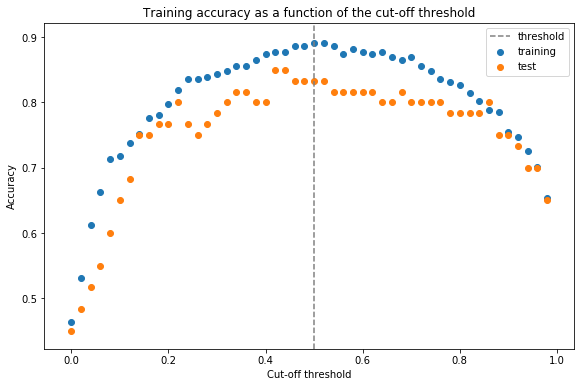

Max training accuracy :  0.890295358649789 
Threshold of maximum training accuracy:  0.5


In [107]:
def explore_thresholds(LR_model, X, y, thresholds):
    '''
    Computes accuracies by varying the cut-off threshold given a model, the input data and a range of thresholds. A ground truth needs to be provided
    to estimate the accuracy
    Works specifically for the Cleveland dataset.
    '''
    y_bool = (y == 'H')
    accuracies = [(np.sum(y_bool ==  ~(LR_model.predict_proba(X)[:,0] >= th)) / len(y)) for th in thresholds]
    
    return accuracies

# generate a range of thresholds from 0 to 1.
h=.02
x_min=0.0
x_max=1.0

thresholds=np.arange(x_min, x_max, h) # set of thresholds from 0 to 1
accuracies = explore_thresholds(LR_model_1, input_train, y_train, thresholds) # computed accuracies for each threshold

plt.rcParams['figure.figsize'] = [9.5, 6]
plt.scatter(thresholds, accuracies)
plt.xlabel('Cut-off threshold')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of the cut-off threshold')
plt.axvline(x=0.5,color='gray', linestyle='--') 

accuracies_test = explore_thresholds(LR_model_1, input_test, y_test, thresholds)
plt.scatter(thresholds, accuracies_test)

plt.legend(['threshold', 'training', 'test'])
plt.show()

print('Max training accuracy : ',np.max(accuracies),'\nThreshold of maximum training accuracy: ', thresholds[np.argmax(accuracies)])

The dashed line denotes the threshold value used "by default". 
<div class="alert alert-info">

**Question 9:** Based on this results, would you rather use your "personalized" threshold to predict future samples? If yes, which value? <u>justify your answer</u>. 

</div>

<div class="alert alert-info">

**Answer 9:**
    No, according to the result shape, the Threshold value of maximum training accuracy (which is on the middle of the horizontal axis) shows max accuracy of 89%, therefore, the default threshold value (0.5) is the best choice to predict future samples.

</div>

**Replace** <code>custom_t = 0.5</code> with your *personalized* threshold if you have one

In [108]:
#If you chose a specific threshold value to use as cut-off replace 0.5 with your chosen value

custom_t = 0.5

In [109]:
print('******************  Testing accuracy (identifying diseased condition) *********************')
print('ACCURACY: ', predict_and_test(LR_model_1,input_test, y_test))
print('*******************************************************************************************')

#If you chose a specific threshold value to use as cut-off this will be displayed
if custom_t != 0.5:
    print('*********  Testing accuracy with custom cut-off (identifying diseased condition)***********')
    print('ACCURACY: ',explore_thresholds(LR_model_1, input_test, y_test, [custom_t])[0])
    print('*******************************************************************************************')

******************  Testing accuracy (identifying diseased condition) *********************
ACCURACY:  0.8333333333333334
*******************************************************************************************


#### Multinomial classification
Now, we want to know the precise diagnosis of a subject and not just to identify their overall condition (healthy or sick). For that purpose we will use a multinomial classifier. 



In [110]:
# Extract the multinomial targets

y_train_m=y_train_all['diagnosis']
y_test_m=y_test_all['diagnosis']

<div class="alert alert-info">

**Exercise 7:** Use LogisticRegression to train the multinomial case. Call the object LR_model_m. Use tha parameters of before + <code>multi_class='auto'</code>

</div>

In [125]:
from sklearn.linear_model import LogisticRegression
LR_model_m = LogisticRegression(solver='liblinear', max_iter=200, multi_class='auto')
LR_model_m.fit(input_train, y_train_m);

In [126]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/part2_exercise7.py

In [127]:
accuracy_training_m = predict_and_test(LR_model_m, input_train, y_train_m)

print('*******************  Training accuracy (identifying diseased diagnosis) *******************\n')
print('ACCURACY: ', accuracy_training_m, '\n')
print('*******************************************************************************************\n\n\n')

print('******************* absolute error in training accuracy computation ***********************\n')
print('absolute error multinomial case = %e \n' %abs(accuracy_training_m - check.accuracy_training_correct_m))
print('*******************************************************************************************\n')


*******************  Training accuracy (identifying diseased diagnosis) *******************

ACCURACY:  0.6751054852320675 

*******************************************************************************************



******************* absolute error in training accuracy computation ***********************

absolute error multinomial case = 0.000000e+00 

*******************************************************************************************



Assume there is a dummy model that outputs healthy (diagnosis=0) for every single input. The code below implements such a model. 

In [128]:
def dummy_model(X):
    '''
    Returns a zero (no disease) no matter the input
    '''
    return np.zeros(len(X))

accuracy_dummy=np.sum(dummy_model(input_test)==y_test_m)/len(y_test_m)
accuracy_test = predict_and_test(LR_model_m, input_test, y_test_m)

print('******************  Testing accuracy *********************')
print('ACCURACY multinomial: %f' %accuracy_test)
print('ACCURACY dummy: %f' %accuracy_dummy)
print('**********************************************************')

******************  Testing accuracy *********************
ACCURACY multinomial: 0.550000
ACCURACY dummy: 0.550000
**********************************************************


<div class="alert alert-info">
    
**Question 10:** Which model is better between dummy model and your multinomial model? What can you say about your multinomial model based on these results? 

</div>

<div class="alert alert-info">
    
**Answer 10:**
    The multinomial model have the exact accuracy with the Dummy one, so, our model is actually not different from the dummy model, however the accuracy in both cases is 0.55 which is not good.

</div>

# Part 3: Comparing to a different family of methods

In this last part of the lab, we are going to compare logistic regression to a different type of methods that we have not covered in the course and, more specifically, the k nearest neighbors algorithm (kNN).

kNN is considered a non-parametric method given that it makes few assumptions about the form of the data distribution. This approach is *memory-based* as it requires no model to be fit. Nearest-neighbor methods use the observations from the training set closest in input space to $x$ to form $\hat{y}$. It is based on the assumption that if a sample's features are similar to the ones of points of one particular class then it belongs to that class. These points are known as nearest neighbors.

The specific case where $k=1$ is denoted the nearest neighbor algorithm. Here $\hat{y}$ is assigned the value $y_{l}$ of the closest point $x_{l}$ to $x$ in the training data. This corresponds to a *Voronoi tessellation* of the training data. 

#### Algorithm
Given a query point $\mathbf{x}_0$ and a training set $T=(\mathbf{x}_i, y_i)$, $i = 1,..., N$:<br>
1- Compute the distance $d(\mathbf{x}_0, \mathbf{x}_i)$ between $\mathbf{x}_0$ and all $\mathbf{x}_i \in T$.<br>
2- Sort all $ \mathbf{x}_i$ using $d(\mathbf{x}_0, \mathbf{x}_i)$ as sorting criterion. Sort for increasing distance<br>
3- Select the first $K$ points. This points are denoted the k-neighborhoods of $\mathbf{x}_0$, $N_k(\mathbf{x}_0)$.<br>
4- Assign $\hat{y}(\mathbf{x}_0$) based on majority voting:
\begin{equation}
\hat{y}(\mathbf{x}_0) = \arg\max_{y} \sum_{\mathbf{x}_i \in N_k} I(y = y_i)
\end{equation}

An illustration of the algorithm is shown below:
<center>
<img src="data/knn.png" width="200" />

The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle). Source: <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">Wikipedia</a>.    
</center>

<div class="alert alert-info">

**Exercise 8:** Your first task is to implement the K nearest neighbor algorithm by completing the code below. Use the Euclidean distance to measure the distance between two points.
    
</div>

In [138]:
from scipy.spatial import distance # you can select the euclidean distance
from scipy import stats #
from operator import itemgetter


class KNN:
    '''
    k nearest neighboors algorithm class
    __init__() initialize the model
    train() trains the model
    predict() predict the class for a new point
    '''

    def __init__(self, K):
        '''
        INPUT :
        - K : is a natural number bigger than 0 
        '''

        # empty initialization of X and y
        self.X = []
        self.y = []
        # K is the parameter of the algorithm representing the number of neighborhoods
        self.k = K
        
    def train(self,X,y):
        '''
        INPUT :
        - X : is a 2D Nx2 numpy array containing the coordinates of points
        - y : is a 1D Nx1 numpy array containing the labels for the corrisponding row of X
        '''        
        
        self.X=X.copy() # copy your training points
        self.y=y.copy()
       
    #def euclideans(ref_point, co_ords_array):
     #   diffs = co_ords_array - ref_point
      #  sqrd_diffs = numpy.square(diffs)
      #  sum_sqrd_diffs = numpy.sum(sqrd_diffs, axis = 1)
       # euc_dists = numpy.sqrt(sum_sqrd_diffs)
       # return euc_dists

    def predict(self,X_new):
        '''
        INPUT :
        - X_new : is a Mx2 numpy array containing the coordinates of new points whose label has to be predicted
        
        OUTPUT :
        - y_hat : is a Mx1 numpy array containing the predicted labels for the X_new points
    
        ''' 
        ######### YOUR CODE HERE - do not delete this line ################
        
        y_hat = []
        
        for i in range(len(X_new)):
            dst = []
            
            for j in range(len(self.X)):
                dist = distance.euclidean(X_new[i], self.X[j]) #compute distance between X_new with each points of self.X
                dst.append(dist)
                
            sorted_dst_index = np.array(dst).argsort()   # sort distance 
            pred_label = {}
        
            for k in range(self.k):
                class_labels = self.y[sorted_dst_index[k]] # the kth neighbor 
                
                # If we already counted the class lable, the lables increment by one
                if class_labels in pred_label :
                    
                    pred_label[class_labels] += 1
                    
                # else if we didn't count the class lable, we should add it to the lables list   
                else:
                    pred_label[class_labels] = 1
                    
            # Find the label that appears the most
            max_label_index = max(pred_label)
            predicted_class = pred_label[max_label_index]
            
            y_hat.append(predicted_class)
            
            
        y_hat = np.array(y_hat)
        
        ######## END OF YOUR CODE HERE - do not delete this line ##########
        
        
        return y_hat
        

In [139]:
if print_solutions==True :
    %load ./solutions/part3_exercise8.py

#### Testing your implementation
To evaluate the algorithm we are going to use synthetic data coming from a Gaussian mixture model composed of 3 multivariate Gaussian distributions with different means and common covariance. Data is obtained by calling the function <code>gaussians()</code> from the <code>utils.py</code> file.


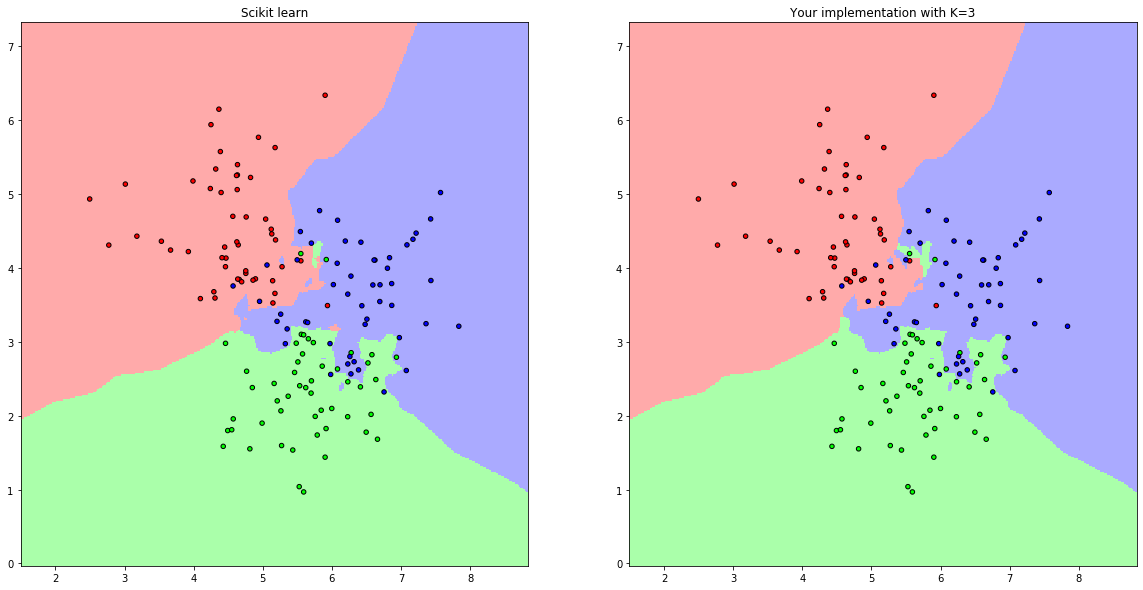

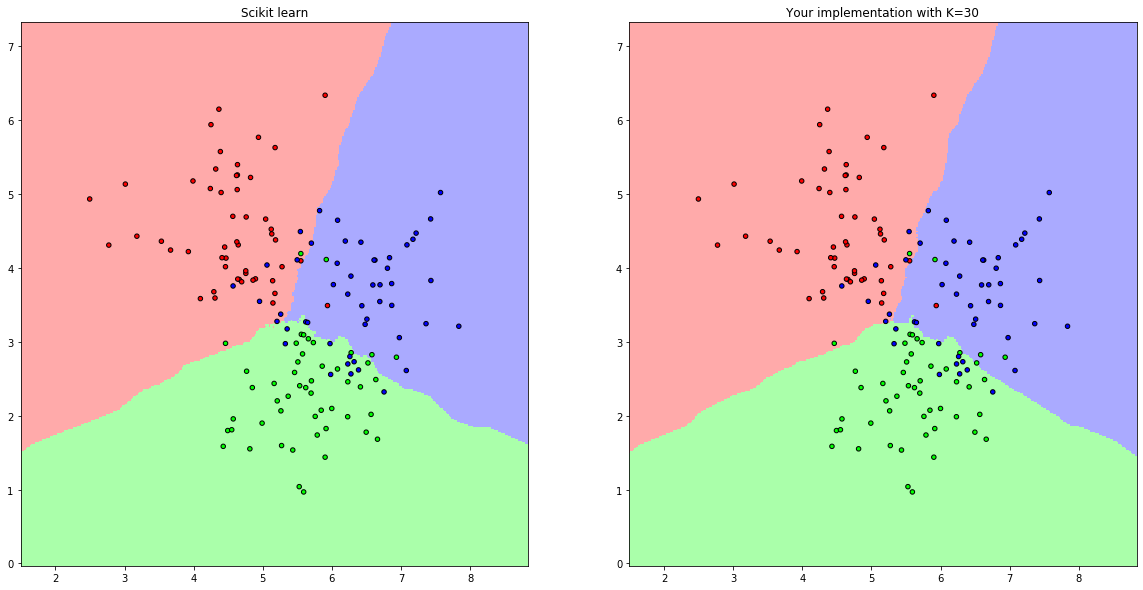

In [140]:
from sklearn import neighbors, datasets, model_selection
import numpy as np
import utils

# Generate the training points from the 3 gaussian distributions
X, y = utils.gaussians()


# Create a grid of testing points
h=.02 # space in the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
X_test = np.c_[xx.ravel(), yy.ravel()]


# Your KNN implementation
# Parameter K defining the KNN algorithm
# K=int(np.sqrt(len(X)))---len(X)=150
K = 3
# Create a model for the KNN with inputs the ones from the gaussians and test the model using the grid of testing points
knn_model_yours = KNN(K)
knn_model_yours.train(X, y)
y_test_yours=knn_model_yours.predict(X_test)
# Put the result into a color plot
y_test_yours = y_test_yours.reshape(xx.shape)


#Scikit-learn implementation
knn_model_scikit = neighbors.KNeighborsClassifier(K, algorithm='kd_tree') #, weights=weights)
knn_model_scikit.fit(X, y)
y_hat_scikit = knn_model_scikit.predict(X_test)
# Put the result into a color plot
y_hat_scikit = y_hat_scikit.reshape(xx.shape)    


# Compare results -> see the comparing_plots function in utils.py
utils.comparing_plots(xx,yy, X, y, y_hat_scikit, y_test_yours, "Scikit learn", "Your implementation with K=" + str(K))

# Other KNN implementation

K2 = 30
my_knn = KNN(K2)
my_knn.train(X, y)
my_knn_results = my_knn.predict(X_test)
# Put the result into a color plot:
my_knn_results = my_knn_results.reshape(xx.shape)

#Scikit-learn implementation
my_knn_model_scikit = neighbors.KNeighborsClassifier(K2, algorithm='kd_tree') #, weights=weights)
my_knn_model_scikit.fit(X, y)
my_y_hat_scikit = my_knn_model_scikit.predict(X_test)
# Put the result into a color plot
my_y_hat_scikit = my_y_hat_scikit.reshape(xx.shape)  
# Compare results -> 
utils.comparing_plots(xx,yy, X, y, my_y_hat_scikit, my_knn_results, "Scikit learn", "Your implementation with K=" + str(K2))

# ATTENTION! the circles in the pictures are the training points.
# Each training input can be red, blue or green depending on its label,
# While the predicted labels for each point in the cartesian plane are the coloured areas, which means
# all the red areas contain the points predicted as belonging to the red gaussian,
# all the green areas contain the points predicted as belonging to the green gaussian,...

#### Comparing KNN and Logistic regression
Finally, we will compare the behaviour of a linear model, such as logistic regression, with KNN. 

<div class="alert alert-info">

**Exercise 9:** Using code from Part 2, train a logistic regression model with the training data from the gaussian dataset (called *X* and *y* in previous cell) and then predict the unseen samples <code>X_test</code>. Store your results in a variable called <code>logistic_results</code>. This will be used to plot the regions defined by the decision functions of the logistic regressor.
    
Train your KNN classifier, with a K of your choice and then predict the unseen samples. Store the results in a variable called <code>knn_results</code>.
    
Plot your results.
   
Have a look at the plots:
    
    1. What can you say of the behaviour of the two models? 
    Based on the evidence, I think both models behave correctly and almost similar in classification of data. 
    
    2. Play around with your K. What changes do you see? Which value of K would you recommend to get decision boundaries similar to those of logistic regression?
    When we change K value (e.g from 3 to 30), the boundaries are clearer and more precise that's because for each point the color is chosen according to more nearest neighbors. Although, in my case all K value shows goos result for classification, I think the most efficient value of K is sqrt(len(X)) (K=12).
    
    According to result, I recommend K= 30 to get decision boundaries nearly similar to those of logistic regression.
    
    3. Based on your results, when would you recommend to use KNN? When a linear model?
    To sum up, when we are unable to separate data classes in linear way(e.g. we have a lot of classified class), the KNN model works well but on the other hand, when the data are linearly separable to few number of classes, the logistic regression model recommended.
</div>

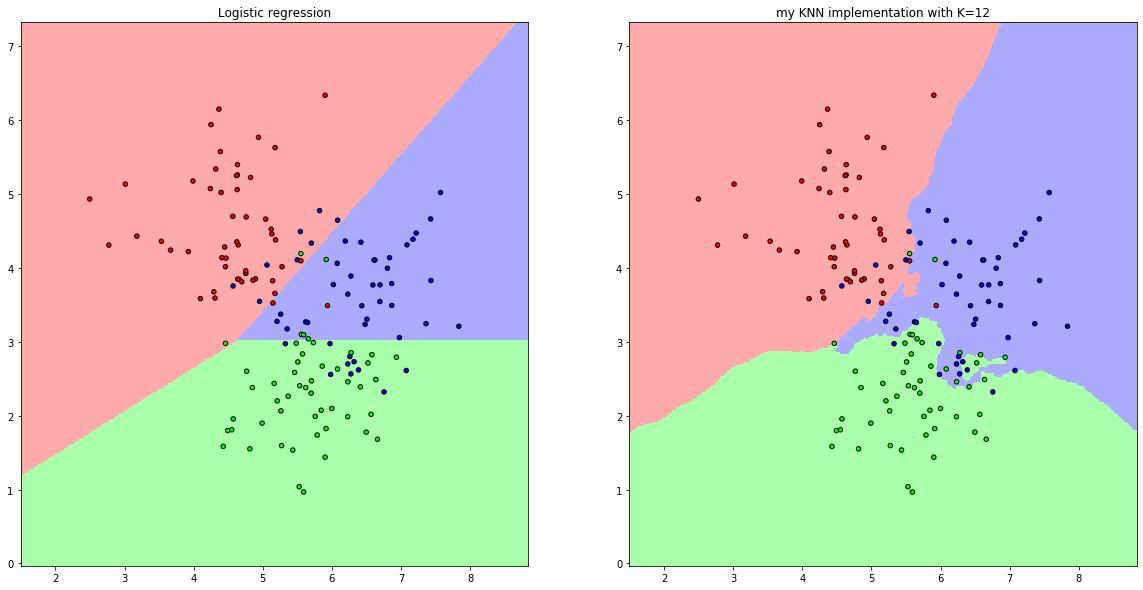

In [141]:
#1)logistic regression:
import sklearn
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear', max_iter=200, multi_class='auto')
logistic_model.fit(X, y)
my_logistic_result = logistic_model.predict(X_test)
my_logistic_result = my_logistic_result.reshape(xx.shape) 

#2)KNN model:
K=12
# Create a my_knn model for the KNN with inputs the ones from the gaussians and test the model using the grid of testing points
my_knn = KNN(K)
my_knn.train(X, y)
my_knn_results = my_knn.predict(X_test)
# Put the result into a color plot:
my_knn_results = my_knn_results.reshape(xx.shape)

# Compare results -> see the comparing_plots function in utils.py
utils.comparing_plots(xx,yy, X, y, my_logistic_result, my_knn_results, "Logistic regression", "my KNN implementation with K=" + str(K))

In [91]:
if print_solutions==True :
    %load ./solutions/part3_exercise9.py